In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from pytz import timezone
import matplotlib.pyplot as plt

In [10]:
data_dir = '/Users/Karolina/ProjectsDataScience/data_science_environment/data/'
file_list = ['MyDataSpotify/StreamingHistory1.json',
             'MyDataSpotify/StreamingHistory2.json',
             'MyDataSpotify/StreamingHistory3.json',
             'MyDataSpotify/StreamingHistory4.json']

dfs = [] # an empty list to store the data frames
for file in file_list:
    data = pd.read_json(data_dir+file) # read data frame from json file
    dfs.append(data) # append the data frame to the list

df = pd.concat(dfs, ignore_index=True) # concatenate all the data frames in the list.

In [11]:
df.head()

,endTime,artistName,trackName,msPlayed
0,2021-01-23 14:36,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464
1,2021-01-23 14:39,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464
2,2021-01-23 14:43,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464
3,2021-01-23 14:46,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464
4,2021-01-23 14:50,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37735 entries, 0 to 37734
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     37735 non-null  object
 1   artistName  37735 non-null  object
 2   trackName   37735 non-null  object
 3   msPlayed    37735 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [13]:
df.endTime = pd.to_datetime(df.endTime, infer_datetime_format=True) 

#Set the current time to US Pacific timezone
df['endTimeTz']= df.endTime.dt.tz_localize(tz='UTC')

#convert US Pacific to Europe/Berlin Timezone
df['endTimeTzEU']=df.endTimeTz.dt.tz_convert(tz='Europe/Berlin')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37735 entries, 0 to 37734
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype                        
---  ------       --------------  -----                        
 0   endTime      37735 non-null  datetime64[ns]               
 1   artistName   37735 non-null  object                       
 2   trackName    37735 non-null  object                       
 3   msPlayed     37735 non-null  int64                        
 4   endTimeTz    37735 non-null  datetime64[ns, UTC]          
 5   endTimeTzEU  37735 non-null  datetime64[ns, Europe/Berlin]
dtypes: datetime64[ns, Europe/Berlin](1), datetime64[ns, UTC](1), datetime64[ns](1), int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
df['hour'] = df.endTimeTzEU.dt.hour

In [16]:
df.head()

,endTime,artistName,trackName,msPlayed,endTimeTz,endTimeTzEU,hour
0,2021-01-23 14:36:00,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464,2021-01-23 14:36:00+00:00,2021-01-23 15:36:00+01:00,15
1,2021-01-23 14:39:00,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464,2021-01-23 14:39:00+00:00,2021-01-23 15:39:00+01:00,15
2,2021-01-23 14:43:00,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464,2021-01-23 14:43:00+00:00,2021-01-23 15:43:00+01:00,15
3,2021-01-23 14:46:00,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464,2021-01-23 14:46:00+00:00,2021-01-23 15:46:00+01:00,15
4,2021-01-23 14:50:00,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464,2021-01-23 14:50:00+00:00,2021-01-23 15:50:00+01:00,15


In [46]:
avg = pd.DataFrame(df.groupby('hour')['trackName'].size())

In [71]:
avg.trackName

hour
0      187
1       41
2       43
3       30
4       20
5       29
6      464
7     2278
8     3063
9     2504
10    2343
11    2435
12    2535
13    2234
14    2148
15    2016
16    2086
17    2136
18    2467
19    2143
20    2030
21    1979
22    1791
23     733
Name: trackName, dtype: int64

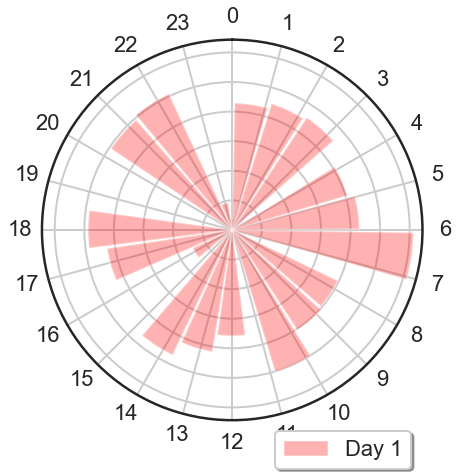

In [58]:
fig = plt.figure(figsize=(7,7))

ax = plt.subplot(111, projection = 'polar')

width = (2*np.pi) / 24
ax.bar(avg.index, avg.trackName, width = width, alpha=0.3, color='red', label='Day 1')

# Make the labels go clockwise
ax.set_theta_direction(-1)

#Place Zero at Top
ax.set_theta_offset(np.pi/2)

#Set the circumference ticks
ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))

# set the label names
ticks = avg.index
# ['12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM','8 AM','9 AM','10 AM','11 AM','12 PM', '1 PM', '2 PM', '3 PM', '4 PM',  '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM' ]
ax.set_xticklabels(ticks)

# suppress the radial labels
plt.setp(ax.get_yticklabels(), visible=False)

#Bars to the wall
#plt.ylim(0,2)

plt.legend(bbox_to_anchor=(1,0), fancybox=True, shadow=True)
plt.show()

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
sns.set_style('white')

<ipython-input-83-43a399ba7bef>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks)


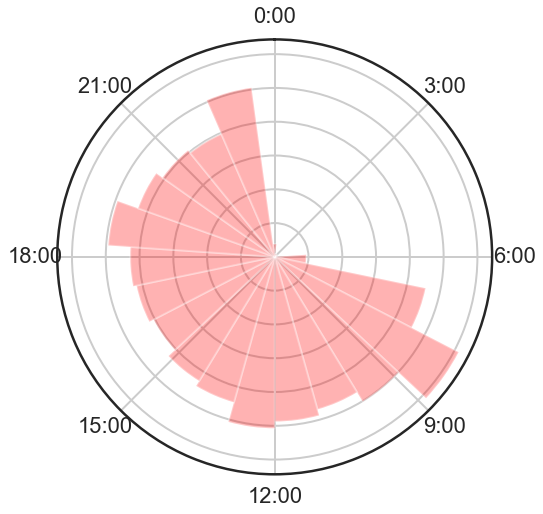

In [83]:
N = 23
bottom = 2

# create theta for 24 hours
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)

# make the histogram that bined on 24 hour
radii, tick = np.histogram(df.hour, bins = 23)

# width of each bin on the plot
width = (2*np.pi) / N

# make a polar plot
plt.figure(figsize = (12, 8))
ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=bottom, alpha=0.3, color='red',)

# set the lable go clockwise and start from the top
ax.set_theta_zero_location("N")
# clockwise
ax.set_theta_direction(-1)

# set the label
ticks = ['0:00', '3:00', '6:00', '9:00', '12:00', '15:00', '18:00', '21:00']
ax.set_xticklabels(ticks)

plt.setp(ax.get_yticklabels(), visible=False)



plt.show()


In [30]:
radii

array([ 187,   41,   43,   30,   20,   29,  464, 2278, 3063, 2504, 2343,
       2435, 2535, 2234, 2148, 2016, 2086, 2136, 2467, 2143, 2030, 1979,
       2524])

In [62]:
avg

,trackName
hour,
0,187
1,41
2,43
3,30
4,20
5,29
6,464
7,2278
8,3063


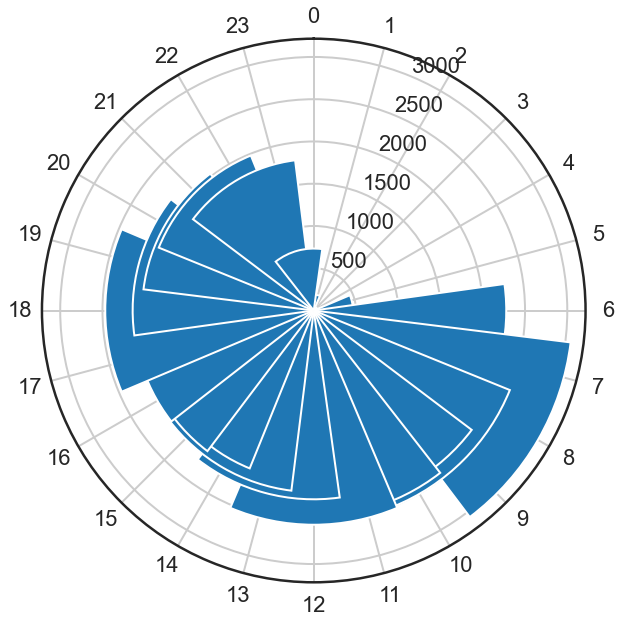

In [85]:
import numpy as np
import matplotlib.pyplot as plt     

plt.figure(figsize = (20, 10))
ax = plt.subplot(111, polar=True)

equals = np.linspace(0, 360, 24, endpoint=False) #np.arange(24)
ones = np.ones(24)
ax.bar(np.deg2rad(equals), avg.trackName)       

# Set the circumference labels
ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
ax.set_xticklabels(range(24))      

# Make the labels go clockwise
ax.set_theta_direction(-1)       

# Place 0 at the top
ax.set_theta_offset(np.pi/2.0)       

plt.show()

In [82]:
np.linspace(0, 360, 24, endpoint=False) #np.arange(24)

array([  0.,  15.,  30.,  45.,  60.,  75.,  90., 105., 120., 135., 150.,
       165., 180., 195., 210., 225., 240., 255., 270., 285., 300., 315.,
       330., 345.])

In [76]:
np.linspace(0.0, 2 * np.pi, N, endpoint=False)


array([0.        , 0.27318197, 0.54636394, 0.81954591, 1.09272788,
       1.36590985, 1.63909182, 1.91227379, 2.18545576, 2.45863773,
       2.7318197 , 3.00500167, 3.27818364, 3.55136561, 3.82454758,
       4.09772955, 4.37091152, 4.64409349, 4.91727546, 5.19045743,
       5.4636394 , 5.73682137, 6.01000334])

In [77]:
np.linspace(0, 360, 24, endpoint=False)

array([  0.,  15.,  30.,  45.,  60.,  75.,  90., 105., 120., 135., 150.,
       165., 180., 195., 210., 225., 240., 255., 270., 285., 300., 315.,
       330., 345.])